<a href="https://colab.research.google.com/github/darishkhan/Numerical-Linear-Algebra-Lab/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Mohd Darish Khan

Roll: 2101MC29

Assignment 1


In [ ]:
# import all libraries used
import numpy as np
import timeit as tm
import openpyxl as ox
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz, lu

In [ ]:
A = np.array([[2, -1, 0], [-1, 2, 1], [0, -1, 2]])
L =np.linalg.cholesky(A)
print(L)

[[ 1.41421356  0.          0.        ]
 [-0.70710678  1.22474487  0.        ]
 [ 0.         -0.81649658  1.15470054]]


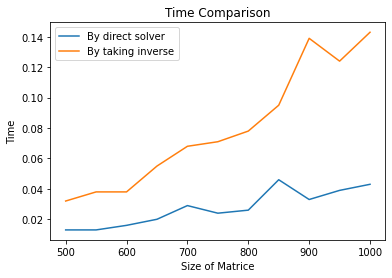

In [ ]:
# Q1.

# initialze a table
table = [["size"],["time1"],["time2"]]

for i in range(500, 1001, 50):
  # generate A and b with random variables
  A = np.random.random_sample((i, i))
  b = np.random.random_sample((i))

  # measure the time elapsed by direct solver
  start1 = tm.default_timer()
  x = np.linalg.solve(A, b)
  end1 = tm.default_timer()

  # measure the time elapsed by inverse method
  start2 = tm.default_timer()
  x = np.dot(np.linalg.inv(A) , b)
  end2 = tm.default_timer()

  # update tabble entries
  table[0].append(i)
  table[1].append((round(end1-start1,3)))
  table[2].append((round(end2-start2,3)))

# create and write in the excel file
wb = ox.Workbook()
sheet = wb.active
for i in range(3):
  for j in range(len(table[0])):
    c = sheet.cell(row = j+1, column = i+1)
    c.value = table[i][j]
wb.save("L1Q1.xlsx")

# read the excel file
wb = ox.load_workbook("L1Q1.xlsx")
sheet = wb.active
data = [["size"],["time1"],["time2"]]
for i in range(3):
  for j in range(sheet.max_row):
    data[i].append(sheet.cell(row = j+1,column = i+1).value)

# plot graph from the read data
plt.plot(data[0][2:], data[1][2:])
plt.plot(data[0][2:], data[2][2:])
plt.xlabel("Size of Matrice")
plt.ylabel("Time")
plt.title("Time Comparison")
plt.legend(["By direct solver", "By taking inverse"])

In [ ]:
# Q2.
# function for forward substitution
def fdSubs_m(L, b):
    ans=[]
    n = len(L)
    for i in range(n):
        k=b[i]
        for j in range(i):
            k-=L[i,j]*ans[j]
        ans.append(np.round(k/L[i,i], 2))
    return ans


n=3
L=np.random.random_sample((n,n))*100//10
b=np.random.random_sample((n))*100//10
for i in range(n):
  for j in range(i+1, n):
    L[i,j]=0
# remove any zero from diagonal elements
for i in range(len(L)):
        if(L[i,i]==0): L[i,i]=1

print("A = \n", L, "\nb = ", b)
print("x = ", fdSubs_m(L,b))


A = 
 [[2. 0. 0.]
 [4. 6. 0.]
 [2. 3. 1.]] 
b =  [4. 2. 3.]
x =  [2.0, -1.0, 2.0]


In [ ]:
# Q3.
# function for backward substitution
def bdSubs_m(L, b):
    n = len(L)
    ans = []
    for i in range(n-1,-1,-1):
        k = b[i]
        for j in range(n-1,i,-1):
            k -= L[i,j] * ans[n-j-1]
        ans.append(np.round(k/L[i,i],2))
    return ans


n=3
L=np.random.random_sample((n ,n ))*100//10
b=np.random.random_sample((n))*100//10
# remove any zero from diagonal elements
for i in range(n):
  for j in range(i):
    L[i,j]=0
for i in range(len(L)):
    if(L[i,i]==0): L[i,i]=1

print("A = \n", L, "\nb = ", b)
print("x = ", bdSubs_m(L,b))

A = 
 [[3. 7. 9.]
 [0. 7. 8.]
 [0. 0. 3.]] 
b =  [7. 6. 0.]
x =  [0.0, 0.86, 0.33]


In [ ]:
# Q4.
# function to compute L and U
def luSelfP_m(A):
  n=len(A)
  lower = np.zeros((n,n))
  upper = np.zeros((n,n))

  for i in range(n):
      for k in range(i, n):
          sum = 0
          for j in range(i):
              sum += (lower[i,j] * upper[j,k])
          upper[i,k] = np.round(A[i,k] - sum, 3)

      for k in range(i, n):
          if (i == k):
              lower[i,i] = 1
          else:
              sum = 0
              for j in range(i):
                  sum += (lower[k,j] * upper[j,i])
              lower[k,i] = np.round(((A[k,i] - sum) /upper[i,i]),3)
  # return L and U
  return(lower, upper)

In [ ]:
n=8
x=np.array([2,-1])
x=np.append(x,np.zeros((1,n-2)))            # array to generate A
A= toeplitz(x)                              # generate A
b=np.ones((1,8))                            # generate b with all ones
print("A = \n", A, "\nb = ", b)
L,U = luSelfP_m(A)                          # compute LU
                                            # Now, AX=b => LUX = b => LY = b
print("\nL = \n", L, "\n\nU = \n", U)
Y = fdSubs_m(L, np.transpose(b))            # compute Y
X = bdSubs_m(U, Y)                          # compute X
print("\n final answer = ", [x[0] for x in X])


A = 
 [[ 2. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0. -1.  2.]] 
b =  [[1. 1. 1. 1. 1. 1. 1. 1.]]

L = 
 [[ 1.     0.     0.     0.     0.     0.     0.     0.   ]
 [-0.5    1.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.667  1.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.75   1.     0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.8    1.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.833  1.     0.     0.   ]
 [ 0.     0.     0.     0.     0.    -0.857  1.     0.   ]
 [ 0.     0.     0.     0.     0.     0.    -0.875  1.   ]] 

U = 
 [[ 2.    -1.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     1.5   -1.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     1.333 -1.     0.     0.     0.     0.   ]
 [ 0.     0.  